# Lab 4 Solution sketch

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)


### 1. Employment

a. Create a variable for the employment rate in the country (employment(emp)/population(pop)). Also create a variable for real GDP growth. (Hint: you will need to use groupby and transform. For a function you can also make use of the *shift* operator, where if we have a pandas series, x, then x.shift() will shift the whole series forward by 1.) 

b. For the 2019 data, make a scatter plot of the employment rate vs. real GDP growth. Represent population as the size of the dots. Add text labels to a handful of the variables. 

c. Plot the employment rate against another variable that might explain differences in employment rate. Overlay a regression line on the chart

In [21]:
pwt = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")



In [22]:
pwt["empRate"] = pwt["emp"]/pwt["pop"]

def growthTrans(x):
    return((x-x.shift(1))/x.shift(1))

#test function:
growthTrans(pwt.loc[pwt.country=="Norway","rgdpe"])

8890         NaN
8891    0.072088
8892    0.035402
8893    0.032451
8894    0.032272
          ...   
8955   -0.048231
8956   -0.029194
8957    0.048714
8958    0.046163
8959   -0.016893
Name: rgdpe, Length: 70, dtype: float64

In [23]:
pwt["rgdpGrowth"] = pwt.groupby("country")["rgdpe"].transform(growthTrans)

pwt2019 = pwt.loc[pwt.year==2019].copy()

In [24]:
pwt2019

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,empRate,rgdpGrowth
69,ABW,Aruba,Aruban Guilder,2019,3921.261230,3467.299561,0.106314,0.047601,NaN,NaN,...,2.125690e-07,0.883092,0.815759,0.744329,0.707260,0.622660,0.813961,0.616383,0.447739,-0.001605
139,AGO,Angola,Kwanza,2019,228151.015600,227855.718800,31.825295,16.644962,NaN,1.481984,...,-1.204703e-01,0.438169,0.342872,0.240024,0.476486,0.611627,0.209101,0.378033,0.523010,-0.048233
209,AIA,Anguilla,East Caribbean Dollar,2019,376.634979,225.680527,0.014869,NaN,NaN,NaN,...,-1.433542e-01,1.064513,1.029199,0.732212,0.768944,0.602734,0.902942,NaN,NaN,0.044416
279,ALB,Albania,Lek,2019,35890.019530,36103.042970,2.880917,1.075898,NaN,2.964992,...,6.114468e-02,0.473077,0.456882,0.235589,0.629832,0.525463,0.299344,NaN,0.373457,0.018204
349,ARE,United Arab Emirates,UAE Dirham,2019,681525.812500,645956.250000,9.770529,5.808834,NaN,2.746695,...,-4.849210e-07,0.725061,0.480580,0.692488,0.688882,0.647336,0.268754,NaN,0.594526,0.063630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,VNM,Viet Nam,Dong,2019,750726.750000,724123.375000,96.462106,50.399563,2131.968232,2.869998,...,-5.730492e-02,0.347591,0.399158,0.245056,0.695617,0.676502,0.249071,NaN,0.522480,0.064025
12599,YEM,Yemen,Yemeni Rial,2019,50052.933590,51828.058590,29.161922,5.531877,NaN,1.842989,...,-1.733917e-01,0.777612,0.238807,0.211786,0.632594,0.670528,0.171695,NaN,0.189695,0.027783
12669,ZAF,South Africa,Rand,2019,748940.000000,734094.375000,58.558270,18.642710,2191.363362,2.908202,...,4.914912e-03,0.463660,0.523813,0.447869,0.660216,0.604546,0.312701,0.515177,0.318362,0.007536
12739,ZMB,Zambia,Kwacha,2019,57956.183590,56783.714840,17.861030,5.225448,NaN,2.686845,...,2.839118e-02,0.373077,0.482041,0.330470,0.574416,0.531915,0.296795,0.342464,0.292561,0.022670


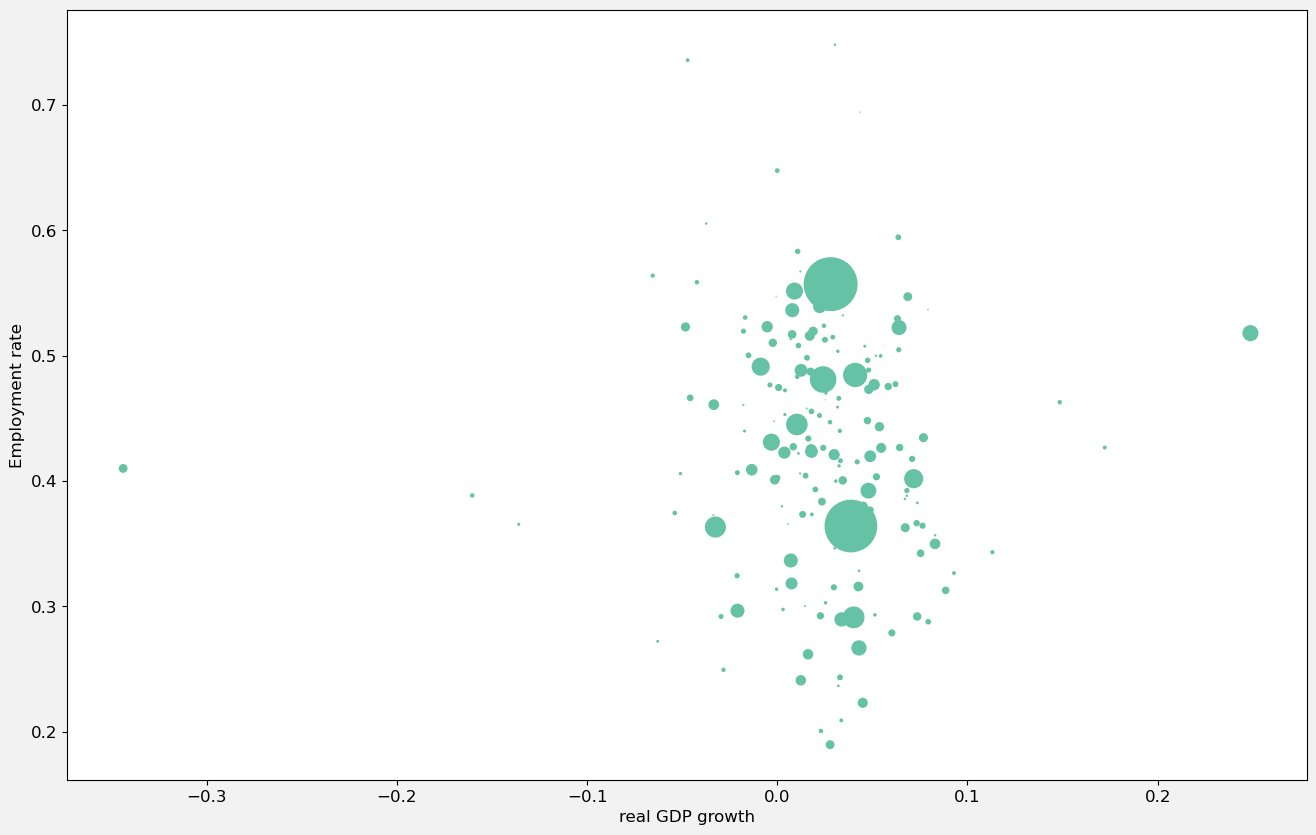

In [26]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.rgdpGrowth, y=pwt2019.empRate, s=pwt2019["pop"])
ax.set_xlabel("real GDP growth")
ax.set_ylabel("Employment rate")
plt.show()

Now let's add some labels. We see one outlier with a very high growth rate in real GDP. Let's see what this is:


In [28]:
#pwt2019.loc[pwt2019.rgdpGrowth>.2,:]
pwt2019.loc[pwt2019.rgdpGrowth<-.2,:]

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,empRate,rgdpGrowth
12389,VEN,Venezuela (Bolivarian Republic of),Bolivar Fuerte,2019,7166.571777,7160.106934,28.515829,11.6944,NaN,2.893462,...,-0.402837,18.143538,34.444988,14.175777,0.581305,0.645909,20.649197,11.75262,0.410102,-0.34383


In [29]:
countries = ["Ethiopia", "China", "India", "United States", "France", "Venezuela (Bolivarian Republic of)"]


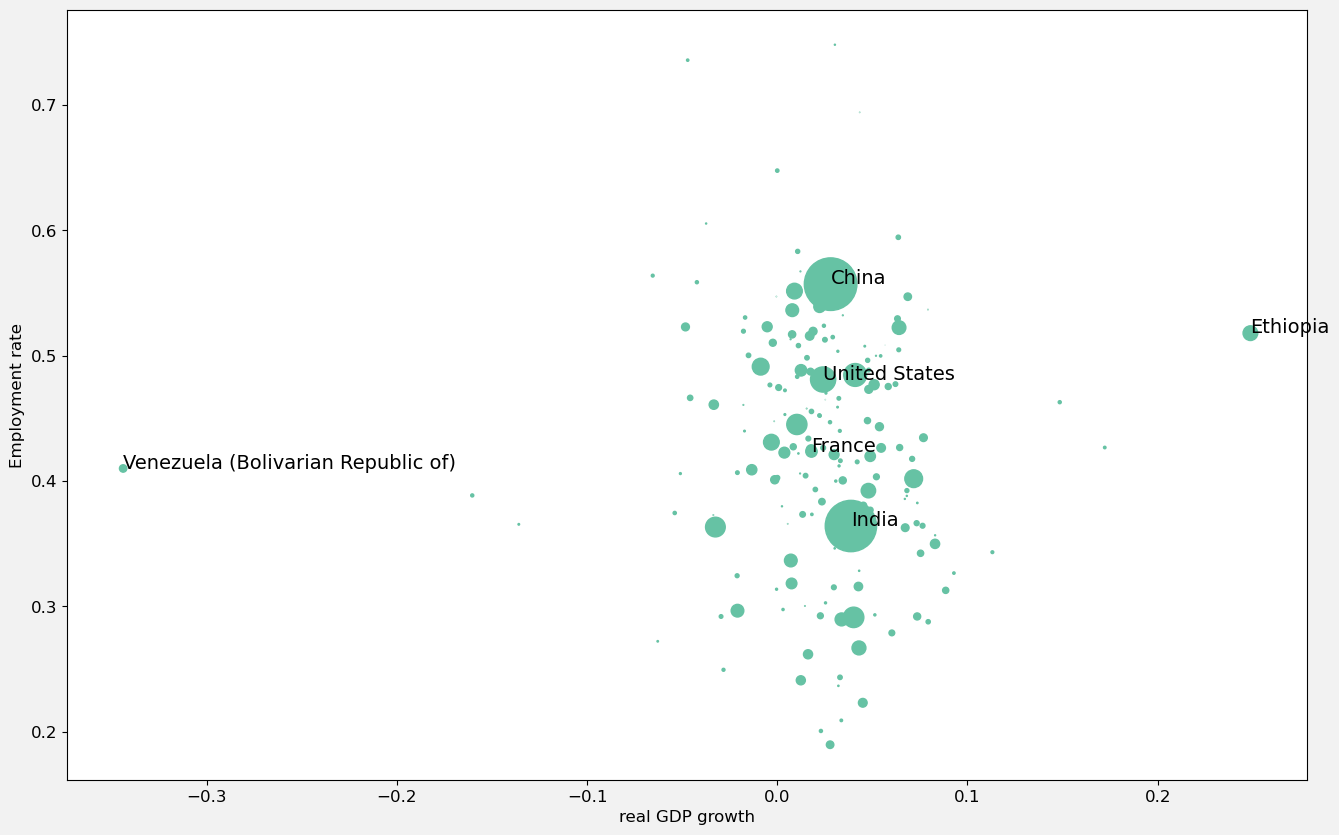

In [30]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.rgdpGrowth, y=pwt2019.empRate, s=pwt2019["pop"])
ax.set_xlabel("real GDP growth")
ax.set_ylabel("Employment rate")
for index, country in pwt2019.loc[pwt2019.country.isin(countries),:].iterrows():
    ax.text(country.rgdpGrowth, country.empRate, country.country)
plt.show()

We could try plotting the employment rate against the human capital indicator

In [18]:
import statsmodels.formula.api as smf

fit0 = smf.ols('empRate ~ hc', data=pwt2019).fit()
a = fit0.params[0]
b = fit0.params[1]
x = np.linspace(1,4.5,100)
fitted = a+b*x



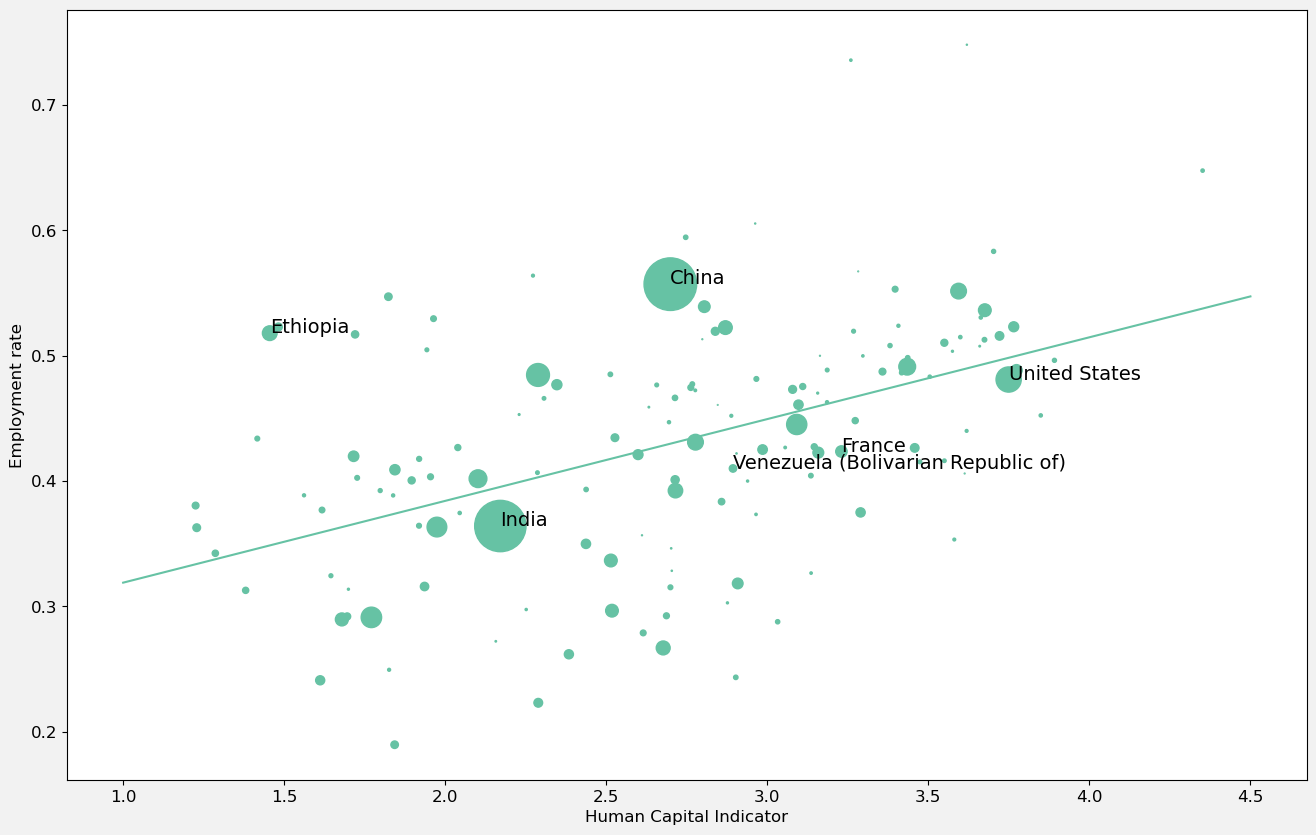

In [19]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.hc, y=pwt2019.empRate, s=pwt2019["pop"])
ax.set_xlabel("Human Capital Indicator")
ax.set_ylabel("Employment rate")
for index, country in pwt2019.loc[pwt2019.country.isin(countries),:].iterrows():
    ax.text(country.hc, country.empRate, country.country)
ax.plot(x, fitted, "-")
plt.show()

### 2. Inflation over time

a. Create a new variable that measures inflation using the index variable *pl_c*, price level of household consumption (Hint: use groupby and transform as well as the shift operator to create the variable

b. Plot inflation over time for a handful of countries. Use both a single axis and faceting

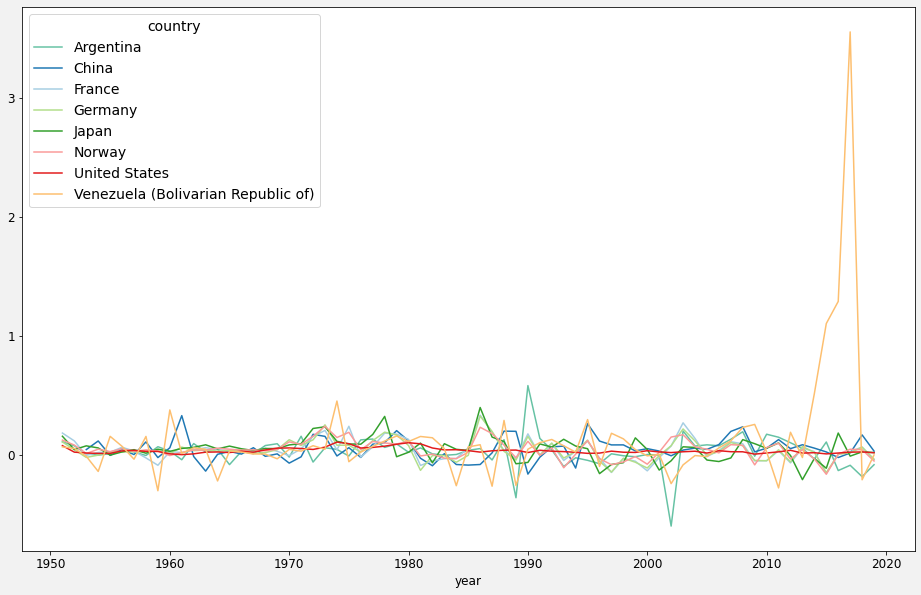

In [89]:
pwt["inflation"] = pwt.groupby("country")["pl_c"].transform(growthTrans)
countries = ["Norway", "Germany", "France", "United States", "China", "Japan", "Venezuela (Bolivarian Republic of)", "Argentina"]



fig, ax = plt.subplots()
pwt.loc[pwt.country.isin(countries),:].pivot(index="year", columns="country", values="inflation").plot(ax=ax)
plt.show()

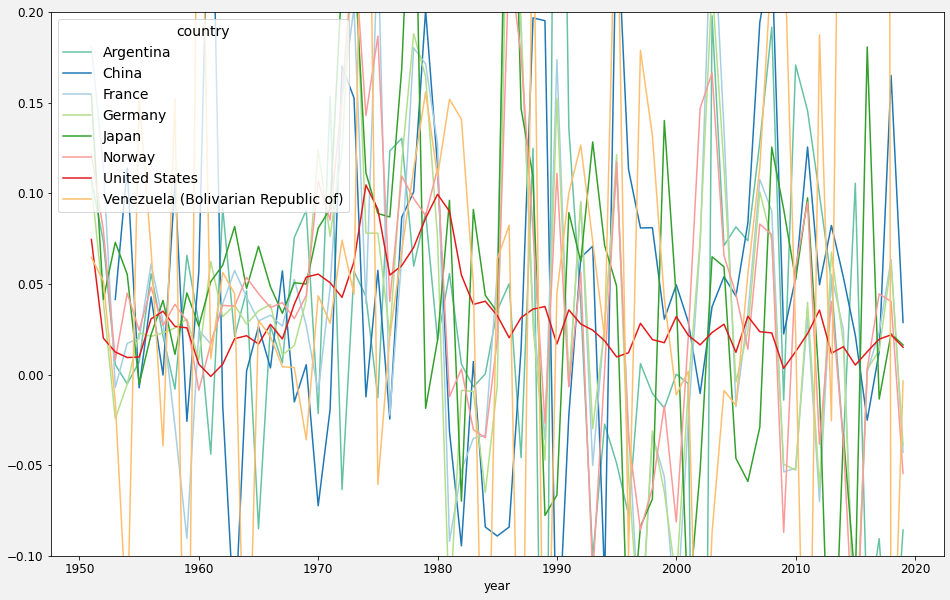

In [102]:
fig, ax = plt.subplots()
pwt.loc[pwt.country.isin(countries),:].pivot(index="year", columns="country", values="inflation").plot(ax=ax)
ax.set_ylim(-.1, .20)
plt.show()

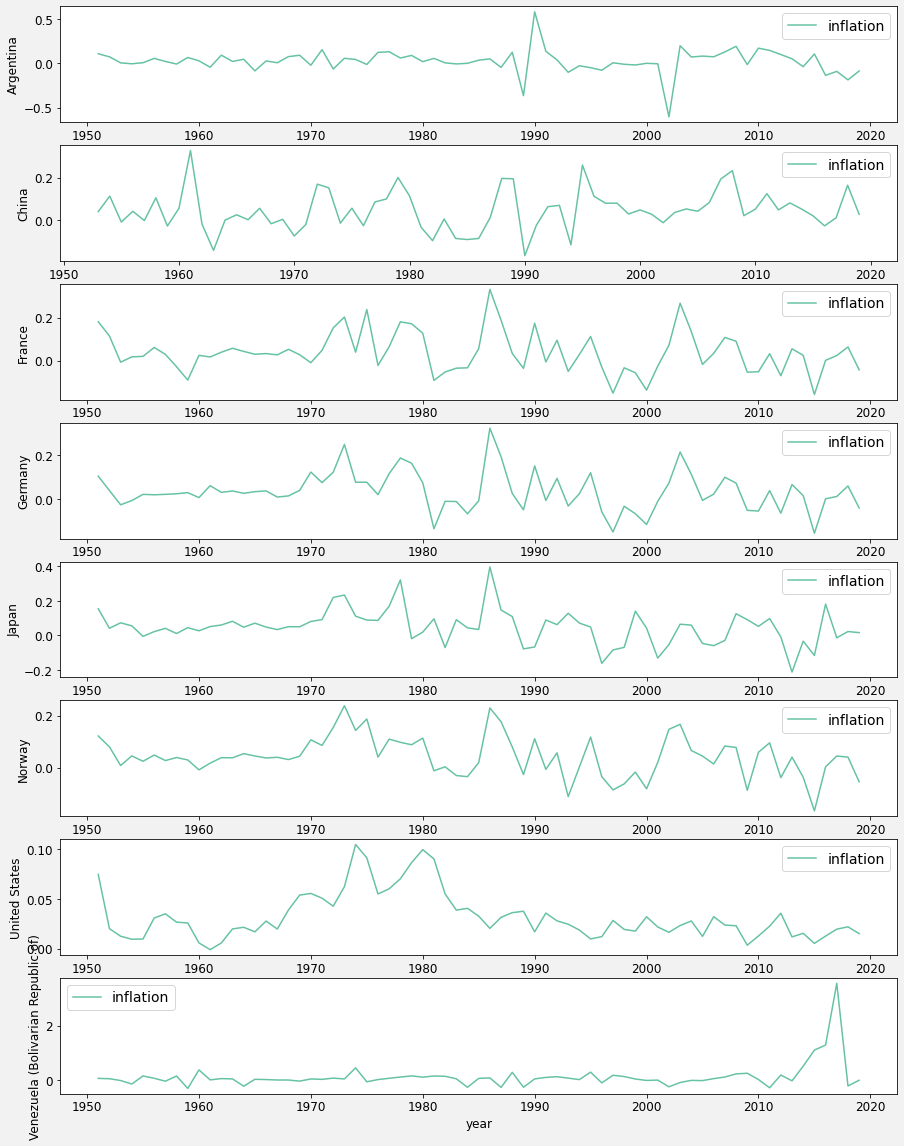

In [101]:

pwtGroup = pwt.loc[pwt.country.isin(countries),:].groupby("country")


i = 0
fig, ax = plt.subplots(8)
fig.set_size_inches(15,20)
for label, data in pwtGroup:
    data.plot(x="year", y="inflation", ax=ax[i])
    ax[i].set_ylabel(label)
    i+=1
